In [23]:
import numpy as np
import matplotlib.pyplot as plt
from math import *
from tqdm import tqdm
import pandas as pd
from prettytable import PrettyTable
import scipy.stats as stats

## Q1

In [24]:
def linear_fit(x, y, dx):
    # Calculate the weights
    w = 1 / dx**2

    # Calculate the sums needed for the normal equations
    S = np.sum(w)
    Sx = np.sum(w * x)
    Sy = np.sum(w * y)
    Sxx = np.sum(w * x**2)
    Sxy = np.sum(w * x * y)

    # Solve the normal equations
    a1 = (S * Sxy - Sx * Sy) / (S * Sxx - Sx**2)
    a0 = (Sy - a1 * Sx) / S

    # Calculate the errors on the parameters
    error_a1 = np.sqrt(S / (S * Sxx - Sx**2))
    error_a0 = np.sqrt(Sxx / (S * Sxx - Sx**2))

    # Calculate the coefficient of determination (R^2)
    y_fit = a0 + a1 * x
    residuals = y - y_fit
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - ss_res / ss_tot

    return a0, a1, error_a0, error_a1, r2

The value of lambda 0.03450441573467998
The life time is 1/lambda 28.981797799141162


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\ANINDIT\AppData\Local\Temp\ipykernel_7972\2674983373.py:2: SyntaxWarning: invalid escape sequence '\s'
  data = pd.read_csv('endsemfit.txt', sep='\s+', header=None)


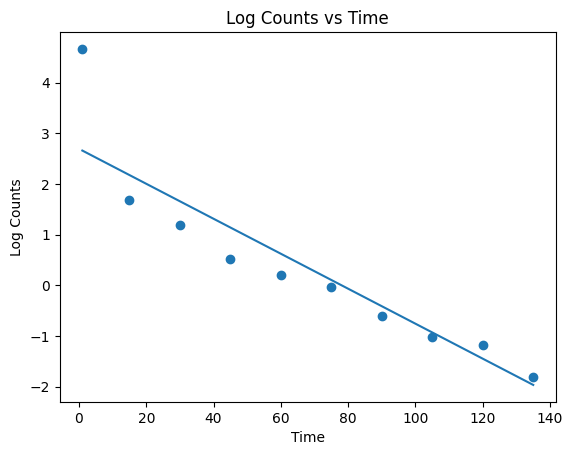

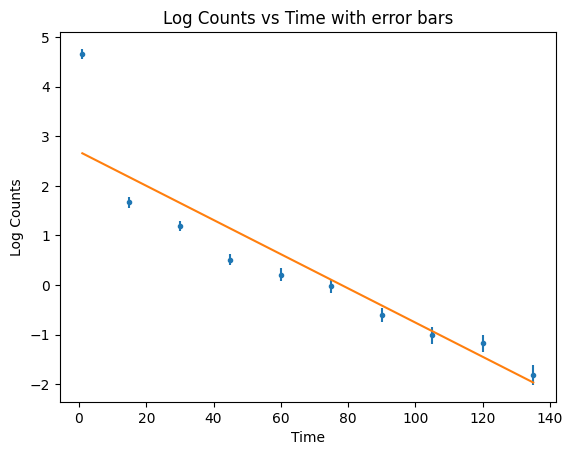

In [25]:
# Read data from file
data = pd.read_csv('endsemfit.txt', sep='\s+', header=None)
time = data.iloc[:, 0]
x = data.iloc[:, 1]
del_x = data.iloc[:, 2]

a1,a2,error_a1,error_a2,r2 = linear_fit(x = x,y = time,dx = del_x)

X = time
Y = ((np.log(np.array(x)/np.array(time)))).tolist()
X_e = del_x

a1,a2,error_a1,error_a2,r2 = linear_fit(x = X,y = Y,dx = X_e)

print(r'The value of lambda',-1*a2)
print("The life time is 1/lambda",-1/a2)

plt.scatter(time,(np.log(np.array(x)/np.array(time))))
plt.plot(time,np.array(time)*a2 +a1)

plt.xlabel("Time")
plt.ylabel("Log Counts")
plt.title("Log Counts vs Time")
plt.show()

#plot with error bars
plt.errorbar(time,(np.log(np.array(x)/np.array(time))),yerr = 1/del_x,fmt='.')
plt.plot(time,np.array(time)*a2 +a1)

plt.xlabel("Time")
plt.ylabel("Log Counts")
plt.title("Log Counts vs Time with error bars")
plt.show()


In [26]:
a1,a2,error_a1,error_a2,r2 = linear_fit(x = X,y = Y,dx = X_e)

# Calculate expected values from the linear fit
expected_values = np.array(time)*a2 + a1

# Calculate chi-square statistic
chi2 = np.sum((((np.array(Y)) - expected_values) ** 2) / expected_values)
# Calculate degrees of freedom
dof = len(time) - 2  # 2 parameters in the linear fit

# Calculate chi-square probability
p_value = 1 - stats.chi2.cdf(chi2, dof)

print(f"Chi-square: {chi2}")
print(f"Degrees of freedom: {dof}")
print(f"P-value: {p_value}")

# Check if the fit is good at the 5% significance level
if p_value > 0.05:
    print("The fit is good at the 5% significance level.")
else:
    print("The fit is not good at the 5% significance level.")

Chi-square: 2.387700894055982
Degrees of freedom: 8
P-value: 0.9667620085023558
The fit is good at the 5% significance level.


## Q2

In [27]:
import numpy as np

# Constants
p = 5.95
R = 0.0821
a = 6.254
b = 0.05422
T = 300

# Fixed point function for V
def f(V):
    return b + R*T/(p + a/(V**2))

# Initial guess for V
V = 1.0

# Tolerance for convergence
tol = 1e-5

# Maximum number of iterations
max_iter = 1000

# Iterate until convergence or maximum number of iterations is reached
for i in tqdm(range(max_iter)):
    V_new = f(V)
    diff = np.abs(V_new - V)
    if diff < tol:
        break
    V = V_new

# Print the result
print("V = {:.5f} L".format(V))
print("Number of iterations: {}".format(i+1))

  1%|          | 8/1000 [00:00<?, ?it/s]

V = 3.92995 L
Number of iterations: 9


The fixed-point iteration method is a numerical technique used to solve equations of the form x = g(x). The method generates a sequence of approximations to the solution (the fixed point) by repeatedly applying the function g.

The reason why different functional forms can give different results is due to the nature of the fixed-point iteration method itself. Here are a few reasons:

1. **Convergence**

2. **Cubic_Function**

3. **Multiple Fixed Points**: Some functions may have multiple fixed points. The fixed point to which the method converges can depend on the initial guess. Different functional forms of the same problem can have different fixed points, leading to different solutions.

In general, when using the fixed-point iteration method, it's important to choose a suitable function and initial guess, and to be aware of the potential issues related to convergence and numerical errors.

## Q7

  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:03<00:00, 15.16it/s]


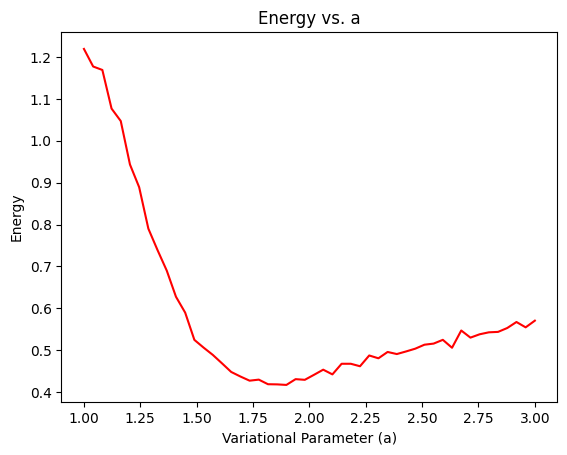

Lowest Energy: 0.41683311073227364
Optimal Variational Parameter (a): 1.8979591836734693


In [28]:
def wavefunction(x, param):
    if abs(x) > 2:
        return 0
    else:
        return (0.5 * (param**2 - x**2))**2

def energy(x,param):
    # if abs(x) > 2:
    #     return 0
    return 0.5*(1/(param**2 - x**2) + x**2)

def MonteCarlo(num_iterations, param):
    position = 0.001 
    energy_values = []

    for k in range(num_iterations):
   
        new_position = position + 0.6*np.random.randn()
        
        acceptance_probability = min(1, wavefunction(new_position, param) / (wavefunction(position, param)))
        
        if np.random.rand() < acceptance_probability:
            position = new_position
        
        # Compute local energy and add to list
        if k > 1000:
            local_energy = energy(position,param)
            energy_values.append(local_energy)

    return np.mean(energy_values)

# Simulation parameters
iterations = 20000
num_param_values = 50
param_values = np.linspace(1, 3, num_param_values)  

# Run Monte Carlo for each value of param
energy_estimates = []
for param in tqdm(param_values):
    estimated_energy = MonteCarlo(iterations, param)
    energy_estimates.append(estimated_energy)

# Find the minimum energy and the corresponding optimal param value
lowest_energy = min(energy_estimates)
optimal_param = param_values[np.argmin(energy_estimates)]

# Plot the energy as a function of param
plt.plot(param_values, energy_estimates, color='r', linestyle='-')
plt.xlabel('Variational Parameter (a)')
plt.ylabel('Energy')
plt.title('Energy vs. a')
plt.show()

print("Lowest Energy:", lowest_energy)
print("Optimal Variational Parameter (a):", optimal_param)

## Q5

In [29]:
def power_method(A, num_simulations: int):
	n = A.shape[0]
	
	# Step 1: Initialize a random vector
	v = np.random.rand(n)
	
	# Step 2: Power method iterations
	for _ in tqdm(range(num_simulations)):
		# Multiply v by the matrix
		Av = np.dot(A, v)
		
		# Normalize Av
		v = Av / np.linalg.norm(Av)
		
	# Step 3: Calculate the eigenvalue
	eigenvalue = np.dot(v, np.dot(A, v)) / np.dot(v, v)
	eigenvector = v
	
	return eigenvalue, eigenvector


In [30]:
# Open the file in read mode
with open('endsemmat.txt', 'r') as f:
    # Read the lines into a list
    lines = f.readlines()

# Initialize an empty list to hold the matrix
matrix = []

# Loop over the lines
for line in lines:
    # Split the line into a list of strings
    row_str = line.split()
    # Convert the strings to integers and append to the matrix
    matrix.append([float(num_str) for num_str in row_str])

# Print the matrix
for row in matrix:
    print(row)

matrix = np.array(matrix)

[2.0, -1.0, 0.0, 0.0, 0.0]
[-1.0, 2.0, -1.0, 0.0, 0.0]
[0.0, -1.0, 2.0, -1.0, 0.0]
[0.0, 0.0, -1.0, 2.0, -1.0]
[0.0, 0.0, 0.0, -1.0, 2.0]


In [31]:
# Obtain the two largest eigenvalues and their corresponding eigenvectors
calculated_eigenvalues = []
calculated_eigenvectors = []
temp_matrix = matrix
for _ in range(2):
    eigenvalue, eigenvector = power_method(temp_matrix, 1000)
    calculated_eigenvalues.append(eigenvalue)
    calculated_eigenvectors.append(eigenvector)

    # Update the matrix by deflation
    temp_matrix = temp_matrix - eigenvalue * np.outer(eigenvector, eigenvector)

# Create a PrettyTable object
table = PrettyTable()

# Add columns
table.field_names = ["Eigenvalue", "Eigenvector"]

# Add rows
for i in range(2):
    table.add_row([calculated_eigenvalues[i], calculated_eigenvectors[i]])

# Print the table
print(table)

100%|██████████| 1000/1000 [00:00<00:00, 200033.57it/s]

+--------------------+------------------------------------------------------------------+
|     Eigenvalue     |                           Eigenvector                            |
+--------------------+------------------------------------------------------------------+
| 3.732050807568877  |  [ 0.28867513 -0.5         0.57735027 -0.5         0.28867513]   |
| 3.0000000000000004 | [-5.00000000e-01  5.00000000e-01 -3.00574694e-16 -5.00000000e-01 |
|                    |                          5.00000000e-01]                         |
+--------------------+------------------------------------------------------------------+


## Theoretical values

In [32]:
# Constants
a = c = -1
b = 2
n = 5

# Compute expected eigenvalues and eigenvectors
expected_eigenvalues = [b + 2 * np.sqrt(a * c) * np.cos(k * np.pi / (n + 1)) for k in range(1, 6)]
expected_eigenvectors = [[2 * (np.sqrt(c / a))**k * np.sin(i * k * np.pi / (n + 1)) for i in range(1, n + 1)] for k in range(1, 6)]

# Normalize the expected eigenvectors
expected_eigenvectors = np.array(expected_eigenvectors)
expected_eigenvectors = expected_eigenvectors / np.linalg.norm(expected_eigenvectors, axis=1)[:, np.newaxis]

# Create a PrettyTable object
table = PrettyTable()

# Add columns
table.field_names = ["Eigenvalue", "Eigenvector"]

# Add rows
for i in range(2):
    table.add_row([expected_eigenvalues[i], expected_eigenvectors[i]])

# Print the table
print(table)

+--------------------+------------------------------------------------------------------+
|     Eigenvalue     |                           Eigenvector                            |
+--------------------+------------------------------------------------------------------+
| 3.7320508075688776 |     [0.28867513 0.5        0.57735027 0.5        0.28867513]     |
|        3.0         | [ 5.00000000e-01  5.00000000e-01  7.07050159e-17 -5.00000000e-01 |
|                    |                         -5.00000000e-01]                         |
+--------------------+------------------------------------------------------------------+


The power method is a simple iterative algorithm used to find an approximation to the dominant eigenvalue and corresponding eigenvector of a matrix. However, there are several reasons why the power method might give different eigenvectors than the theoretical ones, especially regarding the sign of the elements:

1. **Sign Indeterminacy**: Eigenvectors are only determined up to a multiplicative constant. This means that if v is an eigenvector, then so is -v. The power method only finds a vector that points in the same direction as the true eigenvector, but it can't determine the sign. This is why you might see the signs of the elements flipped.

2. **Convergence Issues**: The power method converges only if there is a single dominant eigenvalue, i.e., an eigenvalue that has the largest absolute value. If there are multiple dominant eigenvalues or the dominant eigenvalue is not unique, the power method may not converge to the correct eigenvector.

3. **Starting Vector**: The result of the power method can also depend on the choice of the initial vector. Different initial vectors can lead to different results.

4. **Numerical Errors**: Due to the iterative nature of the power method and the limitations of floating-point arithmetic, numerical errors can accumulate over time, leading to discrepancies between the computed and theoretical eigenvectors.

5. **Matrix Properties**: The power method assumes that the matrix is diagonalizable. If the matrix is defective (i.e., it does not have a complete basis of eigenvectors), the power method may fail to find the correct eigenvectors.

## Q6

100%|██████████| 100000/100000 [00:00<00:00, 679228.51it/s]

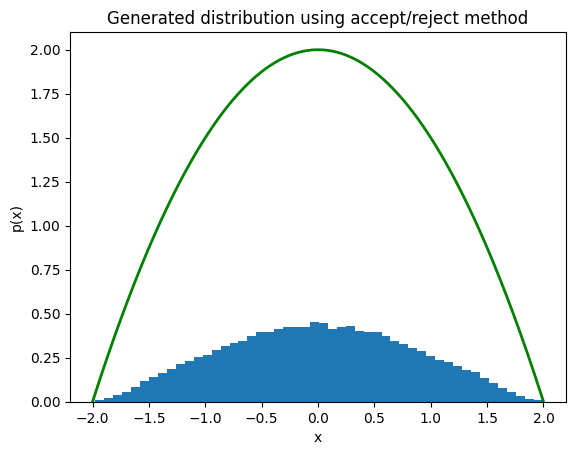

Success probability: 0.9114


In [33]:
import random
import matplotlib.pyplot as plt

def generate_gaussian_sample():
    u = random.uniform(0, 1)
    v = random.uniform(0, 1)
    return sqrt(-2 * log(u)) * cos(2 * pi * v)

def accept_reject_method(num_samples, a):
    accepted_samples = []
    for _ in tqdm(range(num_samples)):
        x = generate_gaussian_sample()
        if abs(x) < a and random.uniform(0, 1) < 0.5 * (a ** 2 - x ** 2):
            accepted_samples.append(x)
    return accepted_samples

def main():
    a = 2
    num_samples = 100000

    accepted_samples = accept_reject_method(num_samples, a)

    # Plot the generated distribution
    plt.hist(accepted_samples, bins=50, density=True)
    x = np.linspace(-a, a, 1000)
    y = 0.5 * (a ** 2 - x ** 2)
    plt.plot(x, y, 'g', linewidth=2)
    plt.title('Generated distribution using accept/reject method')
    plt.xlabel('x')
    plt.ylabel('p(x)')
    plt.show()

    # Calculate success probability
    success_probability = len(accepted_samples) / num_samples
    print(f'Success probability: {success_probability:.4f}')

if __name__ == '__main__':
    main()

This code is using the accept-reject method to generate random samples from a distribution defined by the function p(x) = 0.5 * (a^2 - x^2) for |x| < a, and zero otherwise. The accept-reject method is a simple and flexible technique for generating random samples from an arbitrary probability distribution.

The success probability is calculated as the ratio of the number of accepted samples to the total number of samples generated. This gives an estimate of the proportion of generated samples that fall under the curve of the target distribution.

In this case, the success probability is not pre-calculated based on the areas under the curves of the target and proposal distributions. Instead, it is empirically estimated based on the actual number of accepted samples. This is a practical approach that can provide a good estimate of the success probability, especially when the target distribution is complex and its area is difficult to calculate analytically.

However, it's important to note that the success probability can vary depending on the specific form of the target distribution and the proposal distribution (in this case, a Gaussian distribution). If the proposal distribution is a poor match for the target distribution, the success probability can be low, leading to many rejected samples and inefficient sampling. On the other hand, if the proposal distribution closely matches the target distribution, the success probability can be high, leading to efficient sampling.